# Include new structural models to simulations

# 1. Extract coordinates
Models are downloaded from PDB. See Supplementary for further information. 
Generally, the following information needs to be found: 
- Coordinates of amino acids of interest
- The central axis of the model (See Supplementary material 2.1)
- The subunit membership of the Nup of interest 


## Option 1: Using ChimeraX

https://www.cgl.ucsf.edu/chimerax/docs/user/index.html

Coordinates can be extracted using a program like ChimeraX, See Supplementary table S4 for example commands in ChimeraX.
Load the NPC model of interest as Biological assembly (containing all eight rotational units) as .pdb1.gz or .cif.gz file.
Example: For the C-terminus of Nup107 in model 5A9Q (http://doi.org/10.2210/pdb5A9Q/pdb), the following command is run in ChimeraX: 

`getcr #1.1/M,D,V,4:924@CA`

### Meaning:  
`getcr`: get coordinates of  
`#1.1`: rotational unit 1  
`/M,D,V,4`: Chain ID M, D, V, 4, referencing the 4 x 8 subunits of Nup107  
`:924`: Amino acid 924: The most C-terminally resolved amino acid of Nup107 used in 5A9Q  
`@CA`: C-alpha atom amino acid above 

More examples for ChimeraX commands are in Supplementary Table S4.

### Output: 
**/newModels/ModifyChimeraOutput.py** contains code to transform ChimeraX output to numpy arrays, which can be copy/pasted to **Nups_Info.py** to include into our pipeline (see below)


## Option 2: Programmatically (fastest)
Dowload the NPC model of interest as Biological assembly as .cif.gz file  
Use **/newModels/parse_NPC_cifs.py** to directly generate code for **Nups_Info.py**
Modifications of parse_NPC_cifs.py and the output may be required 

# 2. Save coordinates
All model information and functions are in **Nups_Info.py**. 

Coordinates are saved in **rotUnitCoords()** where if-statements allow to select the PDB model, Nup, and the Nup's terminus.

- Example: N-terminus of Nup133 in model 7PEQ (10.2210/pdb7PEQ/pdb)
- Nup133 occurs in 4 x 8 copies, so 4 copies per rotational unit. 
- Unit is Angstrom as used by structural models, but will automatically be converted to nm later 
- 3D coordinates of the rotational unit of N-Nup133 are saved, here named 
  - authN_AC
  - authN_BC
  - authN_CC
  - authN_DC

# 3. Save central axis 
Rotational unit coordinates can be used to reconstruct coordinates for the full NPC by symmetrically repeating them around the NPC central axis.  
The central axis is saved as x-y coordinates under centre(). See Supplementary for more information. 

# 4. Assign subunit membership 
Subunit membership is saved in assignRing() 
it returns a list with the same length ref.  
Say, `ref = np.array([nup1, nup2, nup3, nup4])`  
Then the subunit membership can be listed in corresponding order,  
e.g. `["CR", "CR", "NR", "NR"]` 
This can be hard-coded (as shown here) or a list can be otherwise generated (as shown in the cell below)

Following subunits are recognised: 
- Cytoplasmic ring ("CR") 
- Nucleoplasmic ring ("NR") 
- Inner ring ("IR")
- Bridge between CR and IR ("BRCR") 
- Bridge between NR and IR ("BRNR")

Supplementary Table S3 lists the subunit-memberships of all user-selectable Nups.
For a good first overview over the subunit location of Nups in human and yeast NPCs, see Figure 1B in:

Beck, M., Hurt, E. The nuclear pore complex: understanding its function through structural insight. Nat Rev Mol Cell Biol 18, 73–89 (2017). [DOI](https://doi.org/10.1038/nrm.2016.147)

Nup155 is the only Nup we assigned to "BRCR" and "BRNR".

# Example: Selected coordinates do not have to be real Nups.
Following coordinates are manually generated. Example code is shown out of context, but can also be found in Nups_Info.py 

## Minimal example: Select and plot model SMILE

In [1]:
# Import relevant packages 
from cir4mics import npc, NPC_plotting 

In [2]:
# Most model parameters can be taken from the cofig file without modificatin
config = '../configs/config.yaml'
var = npc.getVars(config) 

# Select the model. Case of letters doesn't matter 
var["nup"] = ("NotANup",)
var["term"] = ("NotATerm",)
var["model"] = "Smile"

/home/maria/.cache/pypoetry/virtualenvs/cir4mics-UxZJ6OPU-py3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


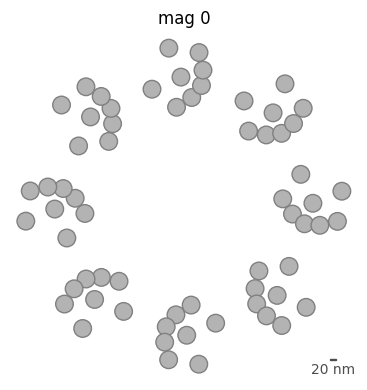

In [3]:
# Compute full "NPC" and plot 
NPCs = npc.getNPCs(var) # NPC 
NPCscoords = npc.getNPCcoords(NPCs, var) #Extract coordinates
NPC_plotting.plotOverview(NPCscoords, NPCs, var, width = 4, markersizemult=1)

## Example: Modifying default symmetry
Coordinates of the rotational unit are still rotated around the central axis, just with a different symmetry 

In [4]:
var["symmet"] = 15 # Symmetry 5
var["mag"] = 100 # To add slight deformation

/home/maria/.cache/pypoetry/virtualenvs/cir4mics-UxZJ6OPU-py3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


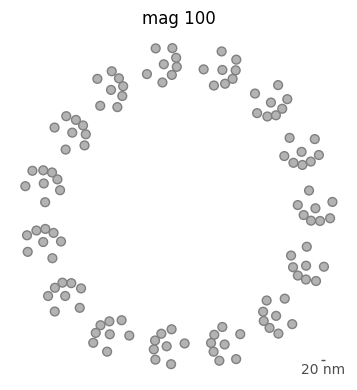

In [5]:
# Compute and plot again 
NPCs = npc.getNPCs(var) 
NPCscoords = npc.getNPCcoords(NPCs, var) 
NPC_plotting.plotOverview(NPCscoords, NPCs, var, width = 4, markersizemult=0.25)